# Caso de São Paulo - empreendimentos vs acidentes
### Gráfico gerado para os slides da apresentação - parte de análise exploratória

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


df_municipios = pd.read_csv('../dados/simu_carteira_municipios.csv')
df_agrupado = pd.read_csv('../dados/tratados/agrupamento_empreend_acidentes_por_municipio_e_ano_sem_nulos.csv')
df_agrupado_merge = df_agrupado.merge(df_municipios, on='Código IBGE', how='left')
df_agrupado_merge = df_agrupado_merge.set_index("ano")
df_agrupado_merge.columns

Index(['Código IBGE', 'vlr_investimento', 'Populacao', 'pop_beneficiada',
       'num_total_empreendimentos', 'aux_emp_metro',
       'aux_emp_metro_vlr_investimento', 'aux_emp_pavimentacao',
       'aux_emp_pavimentacao_vlr_investimento', 'aux_emp_refrota',
       ...
       'mun_FRONTEIRA', 'mun_CAPITAL', 'uf_CODIGO_UF', 'mun_LATITUDE',
       'mun_LONGITUDE', 'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado',
       'uf_SIGLA_UF', 'uf_NOME_UF'],
      dtype='object', length=117)

In [2]:
df_sp = df_agrupado_merge[df_agrupado_merge['mun_MUNNOME'] == 'São Paulo']

df_sp.shape

(10, 117)

In [3]:
import os

# Gera diretório no qual serão salvos os graficos utilizados nos slides

diretorio_salva_graficos = "graficos/"

if not os.path.exists(diretorio_salva_graficos):
    os.makedirs(diretorio_salva_graficos)

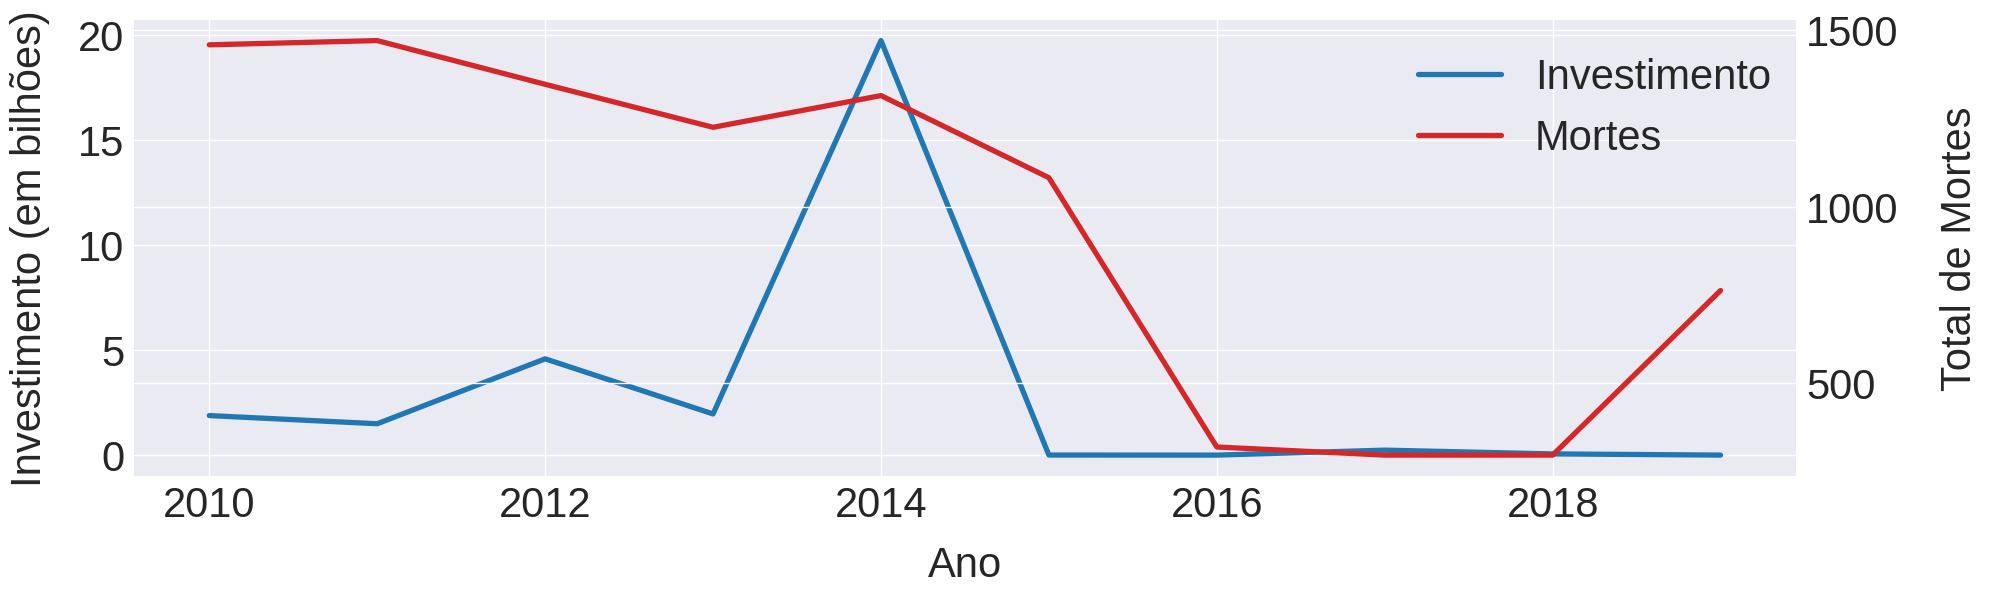

In [4]:
import matplotlib.pyplot as plt

def plotar_com_y2(df, coluna1, coluna2):
    plt.style.use('seaborn')

    fig, ax1 = plt.subplots(figsize=(20, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Ano', fontsize=30, labelpad = 14) 
    ax1.set_ylabel('Investimento (em bilhões)', fontsize=30, labelpad = 20)
    ax1.yaxis.label.set_fontsize(30) 
    ax1.plot(df.index, df[coluna1]/1e9, color=color, linewidth=3.8, label='Investimento')
    ax1.tick_params(axis='y', labelsize=30)

    ax2 = ax1.twinx()

    color = 'tab:red'

    ax2.set_ylabel('Total de Mortes', fontsize=30, labelpad = 30)  
    ax2.yaxis.label.set_fontsize(30) 
    ax2.plot(df.index, df[coluna2], color=color, linewidth=3.8,  label='Mortes')
    ax2.tick_params(axis='y', labelsize=30) 

    ax1.tick_params(axis='x', labelsize=30) 

    fig.tight_layout()

    fig.legend(loc='upper left', bbox_to_anchor=(0.75,1), bbox_transform=ax1.transAxes, fontsize = 30)
    
    plt.savefig('graficos/comparacao_investimento_mortes.png', dpi=300, bbox_inches='tight')

    plt.show()

plotar_com_y2(df_sp, 'vlr_investimento', 'total_mortes')
